# Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import Image
import matplotlib.pyplot as plt
import functools

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Conv1D, Embedding,Reshape, Concatenate,BatchNormalization,GlobalMaxPooling1D,GlobalAveragePooling1D
from keras.layers.merge import Concatenate
from keras.preprocessing import sequence
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras import regularizers
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report


'\nfrom keras.models import Sequential, Model\nfrom keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Conv1D, Embedding,Reshape, Concatenate,BatchNormalization,GlobalMaxPooling1D,GlobalAveragePooling1D\nfrom keras.layers.merge import Concatenate\nfrom keras.preprocessing import sequence\nfrom keras.optimizers import RMSprop, Adam\nfrom keras.preprocessing.sequence import pad_sequences\nfrom keras.utils import to_categorical\nfrom keras.utils import plot_model\nfrom keras import regularizers\nfrom keras import metrics\nfrom keras import backend as K\nfrom keras.wrappers.scikit_learn import KerasClassifier\n\nfrom sklearn import preprocessing\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.preprocessing import LabelBinarizer\nfrom sklearn.model_selection import GridSearchCV \nfrom sklearn.metrics import classification_report\n'

# Training Data

In [3]:
data = pd.read_csv('./../full_RASFF_DATA.csv', sep=';',header=0, index_col = 0)
data = data.sample(frac = 1)
df = data
df

,NUMBER,CLASSIF,DATE_CASE,REF,NOT_COUNTRY,SUBJET,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,PRODUCT,HAZARDS,HAZARDS_CAT,ORIG_COUNTRY,DESTIN_COUNTRY,CONCERN_COUNTRY
33480,30624.0,alert,2010-08-30,2010.1186,Germany,tin (310 mg/kg - ppm) in canned lychee in syru...,fruits and vegetables,food,undecided,withdrawal from the market,distribution on the market (possible),canned lychee in syrup,tin,metals,"China,Netherlands","Belgium,Germany,Ireland,Spain",
51527,48741.0,alert,2004-09-13,2004.453,Germany,benzo(a)pyrene (5.2 µg/kg - ppb) and polycycli...,fish and fish products,food,undecided,(obsolete),distribution on the market (possible),sprats in vegetable oil,"benzo(a)pyrene,polycyclic aromatic hydrocarbons","environmental pollutants,environmental pollutants","Estonia,Germany","Germany,Italy",
54889,52107.0,alert,2003-04-29,2003.114,Germany,"prohibited substance chloramphenicol (0,20 µg/...",wild caught crustaceans and products thereof -...,food,undecided,(obsolete),,frozen freshwater prawns (macrobrachium rosenb...,prohibited substance chloramphenicol,residues of veterinary medicinal products,Vietnam,,"Germany,Spain"
27167,24311.0,information for follow-up,2012-05-30,2012.0735,Germany,pirimiphos-methyl (0.153-0.0156 mg/kg - ppm) i...,feed materials,feed,undecided,re-dispatch,information on distribution not (yet) available,organic toasted soy beans,pirimiphos-methyl,pesticide residues,Italy,Germany,
49723,46948.0,alert,2005-04-26,2005.266,France,olive oil from the West Bank and Gaza Strip vi...,fats and oils,food,undecided,(obsolete),distribution on the market (possible),olive oil,unfit for human consumption,poor or insufficient controls,West Bank and Gaza Strip,"France,Luxembourg,Sweden","Belgium,Spain"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26740,23873.0,border rejection,2012-07-12,2012.BLQ,Sweden,canned skipjack tuna (Katsuwonus pelamis) from...,fish and fish products,food,not serious,import not authorised,no distribution,canned skipjack tuna (katsuwonus pelamis),defective packaging,packaging defective / incorrect,Thailand,,Sweden
7508,4634.0,alert,2018-07-04,2018.1867,Czech Republic,migration of formaldehyde (15.98; 17.9 mg/kg -...,food contact materials,fcm,serious,withdrawal from the market,distribution to other member countries,set of plastic dishes,"migration of formaldehyde,migration of melamine","migration,industrial contaminants",China,"Czech Republic,Slovakia,Ukraine","Germany,INFOSAN,Switzerland"
13700,10822.0,alert,2016-10-21,2016.1446,Croatia,foodborne outbreak suspected (Salmonella enter...,eggs and egg products,food,serious,withdrawal from the market,distribution to other member countries,chicken eggs,foodborne outbreak suspected,pathogenic micro-organisms,Poland,Netherlands,"Croatia,Germany,INFOSAN"
31390,28536.0,border rejection,2011-04-05,2011.ATM,United Kingdom,aflatoxins (B1 = 4 / B1 = 72 / B1 = 40 µg/kg -...,feed materials,feed,undecided,official detention,no distribution,groundnuts for bird feed,aflatoxins,mycotoxins,India,,United Kingdom


# Basic Pre-processing

In [4]:
df['HAZARDS_CAT'] = df['HAZARDS_CAT'].astype(str)
df['DATE_CASE'] = df['DATE_CASE'].astype(str)
df['DATE_CASE'] =pd.to_datetime(df.DATE_CASE)
df['DATE_CASE'] = df.DATE_CASE.dt.month

# Features Selection

In [5]:
features = [0,1,6,8]
target = [2]
X = df.iloc[:,features]
y = df.iloc[:,target]

In [6]:
X

,NUMBER,CLASSIF,PROD_CAT,RISK_DECISION
33480,30624.0,alert,fruits and vegetables,undecided
51527,48741.0,alert,fish and fish products,undecided
54889,52107.0,alert,wild caught crustaceans and products thereof -...,undecided
27167,24311.0,information for follow-up,feed materials,undecided
49723,46948.0,alert,fats and oils,undecided
...,...,...,...,...
26740,23873.0,border rejection,fish and fish products,not serious
7508,4634.0,alert,food contact materials,serious
13700,10822.0,alert,eggs and egg products,serious
31390,28536.0,border rejection,feed materials,undecided


In [7]:
y

,DATE_CASE
33480,8
51527,9
54889,4
27167,5
49723,4
...,...
26740,7
7508,7
13700,10
31390,4


In [8]:
ency = OneHotEncoder(handle_unknown='ignore', sparse = False)
ency.fit(y.values)
y_one_hot = ency.transform(y.values)

NameError: name 'OneHotEncoder' is not defined

# Test Data

## Loaded

In [9]:
data = pd.read_csv('./../full_RASFF_DATA.csv', sep=';', 
                header=0, index_col = 0)
data = data.sample(frac = 1)
test = data
test

,NUMBER,CLASSIF,DATE_CASE,REF,NOT_COUNTRY,SUBJET,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,PRODUCT,HAZARDS,HAZARDS_CAT,ORIG_COUNTRY,DESTIN_COUNTRY,CONCERN_COUNTRY
4971,2107.0,information for attention,2019-03-06,2019.0879,Italy,dried figs from Turkey infested with larvae of...,fruits and vegetables,food,not serious,withdrawal from the market,distribution restricted to notifying country,dried figs,infested with larvae of insects,foreign bodies,Turkey,Italy,
51670,48881.0,information,2004-08-19,2004.BWA,Germany,bad temperature control (-11; -9.6; -9.2; -10....,poultry meat and poultry meat products,food,undecided,re-dispatch,no distribution,frozen chicken breasts,poor temperature control,poor or insufficient controls,Brazil,,Germany
55511,52714.0,information,2003-01-21,2003.ADK,Italy,aflatoxins (B1: 0.2 - 172.1 - 17.3 B2: ND - 12...,"nuts, nut products and seeds",food,undecided,import not authorised,,pistachio nuts,aflatoxins,mycotoxins,Iran,,Italy
5094,2215.0,information for follow-up,2019-02-27,2019.0765,Sweden,unauthorised placing on the market of echinace...,"dietetic foods, food supplements, fortified foods",food,undecided,withdrawal from recipient(s),no distribution from notifying country,echinacea food supplement,unauthorised placing on the market,composition,Finland,Sweden,
54997,52213.0,alert,2003-04-10,2003.090,Norway,Salmonella anatum (1 out of 9 samples) in beef...,meat and meat products (other than poultry),food,undecided,destruction,,beef tenderloin,salmonella enterica ser. anatum,pathogenic micro-organisms,Brazil,,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15964,13105.0,border rejection,2016-01-08,2016.AAS,United Kingdom,aflatoxins (B1 = 6.4; Tot. = 16.5 µg/kg - ppb)...,fruits and vegetables,food,serious,re-dispatch,product not (yet) placed on the market,dried figs,aflatoxins,mycotoxins,Turkey,,United Kingdom
42295,39495.0,alert,2007-10-31,2007.0787,United Kingdom,undeclared soya in rice crackers from the Unit...,cereals and bakery products,food,undecided,withdrawal from the market,distribution on the market (possible),rice crackers,soya undeclared,allergens,"Japan,United Kingdom","Ireland,United Kingdom",Netherlands
58976,56190.0,information,1996-07-08,1996.B,Norway,insufficient labelling of biscuits,cereals and bakery products,food,undecided,,,biscuits,insufficient labelling,labelling absent/incomplete/incorrect,Denmark,,Norway
2305,2303.0,border rejection,2019-11-04,2019.3857,Bulgaria,formetanate (0.102 mg/kg - ppm) in peppers fro...,fruits and vegetables,food,serious,destruction,product not (yet) placed on the market,peppers,formetanate,pesticide residues,Turkey,,"Belgium,Bulgaria"


## Preprocessing

In [10]:
test['HAZARDS_CAT'] = test['HAZARDS_CAT'].astype(str)
test['DATE_CASE'] = test['DATE_CASE'].astype(str)
test['DATE_CASE'] =pd.to_datetime(test.DATE_CASE)
test['DATE_CASE'] = test.DATE_CASE.dt.month

## Features

In [11]:
features = [0,1,6,8]
target = [2]
X_val = test.iloc[:,features]
y_val = test.iloc[:,target]

In [12]:
y_val_one_hot = ency.transform(y_val.values)

NameError: name 'ency' is not defined

# Split train-test-val

In [ ]:
categoical_vars = ['DATE_CASE','NOT_COUNTRY','DISTRIBUTION_STAT','COUNT_ORIGEN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42,shuffle = True)

# Coding and conversion to lists for being able to introduce it into the model

In [ ]:
def preproc(X_train, X_test, Xvalidation_data):
    input_list_train = []
    input_list_test = []
    input_list_testval = []
    
    for c in categoical_vars:
        raw_vals = np.unique(X_train[c])
        val_map = {}
        for i in range(len(raw_vals)):
            val_map[raw_vals[i]] = i       
        
        input_list_train.append(X_train[c].map(val_map).values)
        input_list_test.append(X_test[c].map(val_map).fillna(0).values)
        input_list_testval.append(X_val[c].map(val_map).fillna(0).values)

    return input_list_train, input_list_test,input_list_testval

In [ ]:
input_list_train,input_list_test,input_list_testval = preproc(X_train,X_test, X_val)

# Metrics Definition

In [ ]:
top3_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

top2_acc = functools.partial(metrics.top_k_categorical_accuracy, k=3)
top2_acc.__name__ = 'top2_acc'

In [ ]:
def top_1_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=1) 

In [ ]:
def top_2_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=2) 

In [ ]:
def top_3_categorical_accuracy(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=3) 

# Embeddings + mlp Models (cases 1 and 3)

In [ ]:
input_models=[]
output_embeddings=[]

for categorical_var in categoical_vars:
    cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
    input_name= 'Input_' + categorical_var.replace(" ", "")
    no_of_unique_cat  = X_train[categorical_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
   
    input_model = Input(shape=(1,), name=input_name)
    output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
    output_model = Reshape(target_shape=(embedding_size,))(output_model)    
    
    input_models.append(input_model)
    output_embeddings.append(output_model)
  

output = Concatenate()(output_embeddings)
output = Dense(2048,activation="relu")(output)
output= Dropout(0.3)(output)
output = Dense(1024,activation="relu")(output)
output= Dropout(0.2)(output)
output = Dense(512,activation="relu")(output)
output= Dropout(0.2)(output)
output = Dense(38, activation='softmax')(output)
model = Model(inputs=input_models, outputs=output)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])

In [ ]:
 hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs = 5 , batch_size = 64, verbose=1)

Train on 84917 samples, validate on 28306 samples
Epoch 1/5
84917/84917 [==============================] - 45s 529us/step - loss: 2.0694 - accuracy: 0.4330 - top_1_categorical_accuracy: 0.4330 - top_2_categorical_accuracy: 0.5600 - top_3_categorical_accuracy: 0.6394 - val_loss: 1.7310 - val_accuracy: 0.5183 - val_top_1_categorical_accuracy: 0.5183 - val_top_2_categorical_accuracy: 0.6478 - val_top_3_categorical_accuracy: 0.7181
Epoch 2/5
84917/84917 [==============================] - 45s 530us/step - loss: 1.6462 - accuracy: 0.5413 - top_1_categorical_accuracy: 0.5413 - top_2_categorical_accuracy: 0.6714 - top_3_categorical_accuracy: 0.7423 - val_loss: 1.4991 - val_accuracy: 0.5785 - val_top_1_categorical_accuracy: 0.5785 - val_top_2_categorical_accuracy: 0.7074 - val_top_3_categorical_accuracy: 0.7714
Epoch 3/5
84917/84917 [==============================] - 45s 529us/step - loss: 1.4429 - accuracy: 0.5892 - top_1_categorical_accuracy: 0.5892 - top_2_categorical_accuracy: 0.7230 - top_

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_DATE_CASE (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Input_NOT_COUNTRY (InputLayer)  (None, 1)            0                                            
__________________________________________________________________________________________________
Input_DISTRIBUTION_STAT (InputL (None, 1)            0                                            
__________________________________________________________________________________________________
Input_COUNT_ORIGEN (InputLayer) (None, 1)            0                                            
____________________________________________________________________________________________

## Mean Efficiencies

In [ ]:
historials = []
evaluations = []
for i in range (1,6):
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy', top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])
    hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs = 25 , batch_size = 64, verbose=0)
    historials.append(hist)
    evaluation = model.evaluate(x = input_list_testval, y =  y_val_one_hot)
    evaluations. append(evaluation)
    model.save ("model"+str(i)+".h5")

In [ ]:
suma = 0
for i in evaluations:
    suma = suma + i[2]
print(suma/5)

In [ ]:
model.evaluate(x = input_list_testval, y = y_val)

28306/28306 [==============================] - 2s 87us/step


[1.2287289117542095,
 0.6472126245498657,
 0.6472126245498657,
 0.7761958837509155,
 0.8349466323852539]

## Training Charts

In [ ]:
model.metrics_names

['loss',
 'acc',
 'top_1_categorical_accuracy',
 'top_2_categorical_accuracy',
 'top_3_categorical_accuracy']

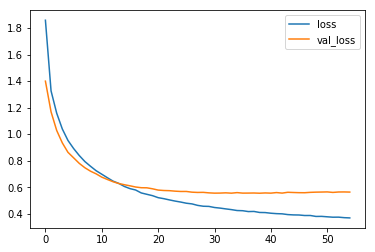

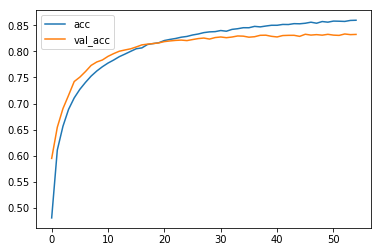

In [ ]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['acc'], label = 'acc') 
plt.plot(hist.history['val_top_1_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()

## Embeddings Representation Test

In [ ]:
embeddings = model.layers[14].get_weights()[0]
embeddings

In [ ]:
embeddings[:,1]

array([ 0.2392255 , -0.2346982 ,  0.4903437 ,  0.25599873, -0.1441072 ,
       -0.01557353, -0.01640102,  0.27828872,  0.20984264, -0.49410602,
       -0.40164003, -0.11440374], dtype=float32)

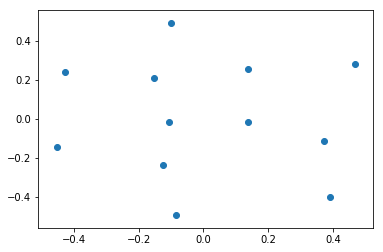

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(embeddings[:,0],embeddings[:,1]) 
plt.show()

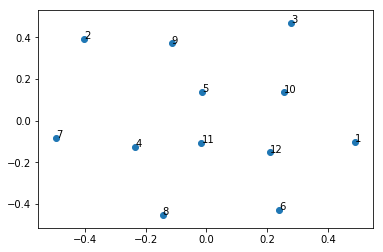

In [ ]:
y = embeddings[:,0]
z = embeddings[:,1]
n = [6, 4, 1, 10,8,5,11,3,12,7,2,9]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

## Models Figure 

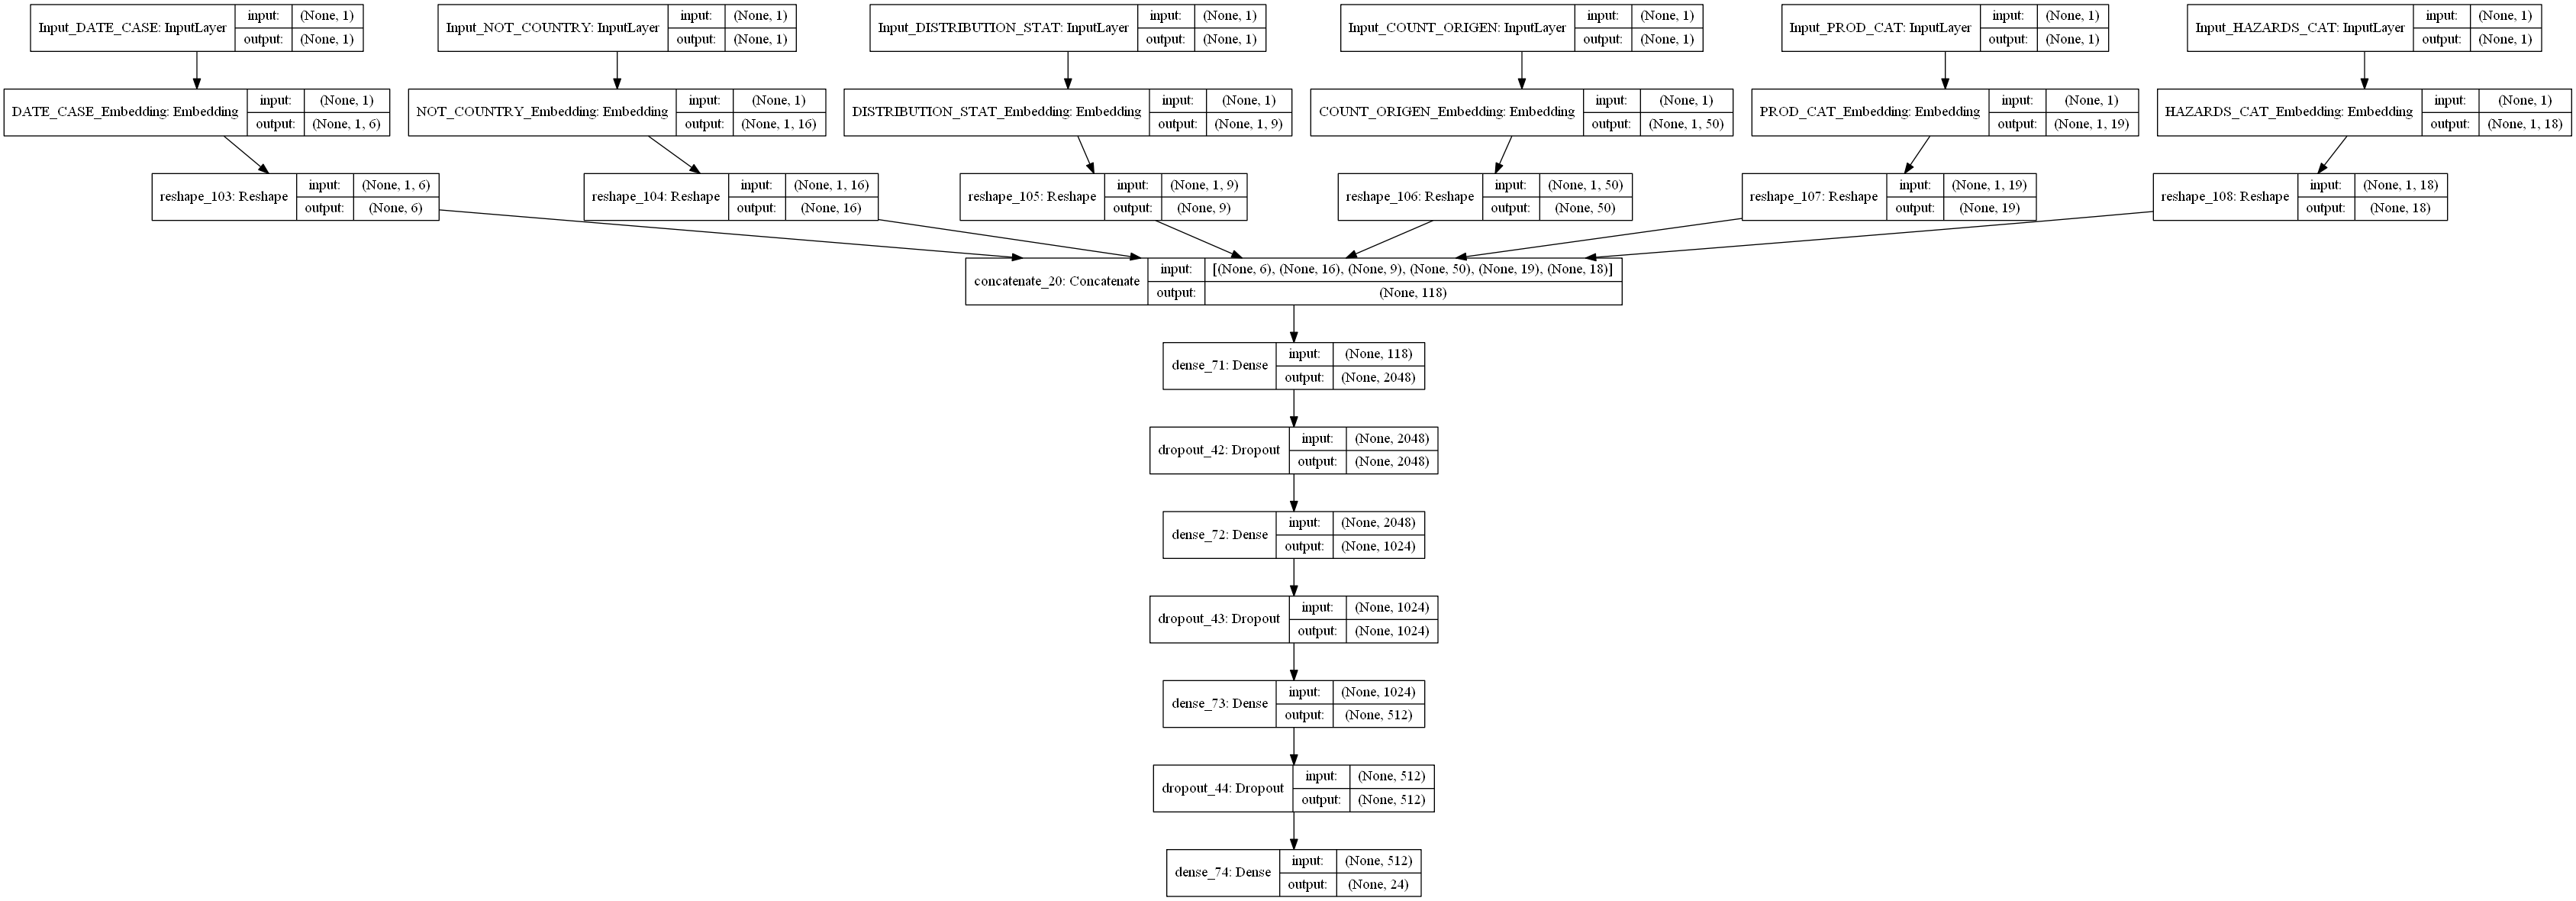

In [ ]:
plot_model(model, to_file='model3.png',show_shapes=True,show_layer_names=True)
Image(retina=True, filename='model3.png')

## Predictions and inverse transformations (converting the numerical prediction to the predicted category)

In [ ]:
prediction = model.predict(input_list_test)
prediction[0]

array([5.3615795e-24, 4.5768328e-14, 2.0483328e-20, 2.7210026e-19,
       5.5586956e-19, 2.9675704e-10, 8.5927073e-12, 3.0571820e-19,
       1.0075099e-11, 2.6107550e-06, 1.1073312e-11, 6.0050798e-22,
       6.2269985e-23, 1.4456352e-22, 8.7427961e-17, 3.3094022e-25,
       5.7479997e-13, 8.5249417e-07, 7.9353856e-19, 4.9578402e-06,
       1.0626364e-28, 2.3907197e-19, 2.5110889e-26, 2.8631649e-17,
       1.9510434e-08, 1.9792678e-15, 5.0914146e-21, 1.1527289e-09,
       9.9999154e-01, 7.1200787e-18, 2.7833156e-22, 1.9643790e-18,
       5.6017002e-17, 2.4905619e-24, 1.2678915e-19], dtype=float32)

In [ ]:
pred = np.around(prediction[12],decimals = 2)
pred

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.97, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ], dtype=float32)

In [ ]:
np.where(pred == 0.97)

(array([25], dtype=int64),)

In [ ]:
pred[25] = 1

In [ ]:
ency.inverse_transform(np.around(pred.reshape(1, -1),decimals = 3)) #Prediction

array([['meat_and_meat_products_(other_than_poultry)']], dtype=object)

In [ ]:
ency.inverse_transform(np.around(y_test[25].reshape(1, -1),decimals = 1)) #Reality

array([['food_contact_materials']], dtype=object)

## Grid search tests

In [ ]:
def create_model(activation = 'relu' ):
    input_models=[]
    output_embeddings=[]

    for categorical_var in categoical_vars:
        
        cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
        input_name= 'Input_' + categorical_var.replace(" ", "")
        no_of_unique_cat  = X_train[categorical_var].nunique()
        embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
        input_model = Input(shape=(1,), name=input_name)
        output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
        output_model = Reshape(target_shape=(embedding_size,))(output_model)    
        input_models.append(input_model)
        output_embeddings.append(output_model)



    output = Concatenate()(output_embeddings)
    output = Dense(2500,activation=activation)(output)
    output= Dropout(0.5)(output)
    output = Dense(1500,activation=activation)(output)
    output= Dropout(0.4)(output)
    output = Dense(1000,activation=activation)(output)
    output= Dropout(0.3)(output)
    output = Dense(38, activation='softmax')(output)
    model = Model(inputs=input_models, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=1,batch_size = 512, epochs = 1000)

In [ ]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation = activation)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(input_list_train,y_train,validation_data=(input_list_test,y_test))

# Embeddings Model + conv (case 2)

In [ ]:
input_models=[]
output_embeddings=[]

for categorical_var in categoical_vars:
    
    cat_emb_name= categorical_var.replace(" ", "")+'_Embedding'
    input_name= 'Input_' + categorical_var.replace(" ", "")
    no_of_unique_cat  = X_train[categorical_var].nunique()
    embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50 ))
    input_model = Input(shape=(1,), name=input_name)
    output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
    output_model = Reshape(target_shape=(embedding_size,))(output_model)    
    input_models.append(input_model)
    output_embeddings.append(output_model)

output = Concatenate()(output_embeddings)

output = Reshape(input_shape=(100,), target_shape=(100, 1))(output)


output = Conv1D(filters=128,kernel_size=4, activation = "relu")(output)
output = Conv1D(filters=128,kernel_size=4, activation = "relu")(output)
output = BatchNormalization()(output)
output = MaxPooling1D(pool_size=2)(output)

output = Conv1D(filters=256,kernel_size=3, activation = "relu")(output)
output = Conv1D(filters=256,kernel_size=3, activation = "relu")(output)
output = BatchNormalization()(output)
output = GlobalMaxPooling1D()(output)


output = Dense(512, activation = "relu")(output)

output = Dense(256, activation = "relu")(output)

output = Dense(35, activation='softmax')(output)

model = Model(inputs=input_models, outputs=output)


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=[top_1_categorical_accuracy,top_2_categorical_accuracy,top_3_categorical_accuracy])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_DATE_CASE (InputLayer)    (None, 1)            0                                            
__________________________________________________________________________________________________
Input_NOT_COUNTRY (InputLayer)  (None, 1)            0                                            
__________________________________________________________________________________________________
Input_DISTRIBUTION_STAT (InputL (None, 1)            0                                            
__________________________________________________________________________________________________
Input_COUNT_ORIGEN (InputLayer) (None, 1)            0                                            
____________________________________________________________________________________________

In [ ]:
plot_model(model, to_file='model2.png',show_shapes=True,show_layer_names=True)
Image(retina=True, filename='model2.png')

In [ ]:
hist = model.fit(input_list_train,y_train,validation_data=(input_list_test,y_test) , epochs =  25, batch_size = 64, verbose= 1)


Train on 84917 samples, validate on 28306 samples
Epoch 1/25
84917/84917 [==============================] - 89s 1ms/step - loss: 1.5825 - top_1_categorical_accuracy: 0.5362 - top_2_categorical_accuracy: 0.6999 - top_3_categorical_accuracy: 0.7776 - val_loss: 1.3890 - val_top_1_categorical_accuracy: 0.5958 - val_top_2_categorical_accuracy: 0.7520 - val_top_3_categorical_accuracy: 0.8247
Epoch 2/25
84917/84917 [==============================] - 95s 1ms/step - loss: 1.2203 - top_1_categorical_accuracy: 0.6327 - top_2_categorical_accuracy: 0.7874 - top_3_categorical_accuracy: 0.8541 - val_loss: 1.1831 - val_top_1_categorical_accuracy: 0.6475 - val_top_2_categorical_accuracy: 0.7980 - val_top_3_categorical_accuracy: 0.8625
Epoch 3/25
84917/84917 [==============================] - 91s 1ms/step - loss: 1.0661 - top_1_categorical_accuracy: 0.6730 - top_2_categorical_accuracy: 0.8232 - top_3_categorical_accuracy: 0.8825 - val_loss: 1.0914 - val_top_1_categorical_accuracy: 0.6746 - val_top_2_ca

In [ ]:
model.evaluate(x = input_list_testval, y = y_val)

100/100 [==============================] - 0s 1ms/step


[0.7639038562774658, 0.77, 0.9, 0.95]

In [ ]:
plt.plot(hist.history['loss'], label = 'loss') 
plt.plot(hist.history['val_loss'], label = 'val_loss') 
plt.legend()
plt.show()


plt.plot(hist.history['categorical_accuracy'], label = 'acc') 
plt.plot(hist.history['val_categorical_accuracy'], label = 'val_acc') 
plt.legend()
plt.show()